# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0013'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('rabbit')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

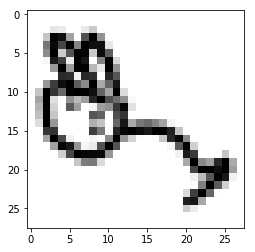

In [5]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

-1.0

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,1]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 14, 14, 128)       204928    
__________

## training

In [ ]:
d_losses, g_losses, d_acc, g_acc = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 5000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.703027] [D acc: 0.539062] [G loss: 0.312771] [G acc: 1.000000]
1 [D loss: 0.996578] [D acc: 0.500000] [G loss: 0.669276] [G acc: 1.000000]
2 [D loss: 0.698045] [D acc: 0.500000] [G loss: 0.679210] [G acc: 0.992188]
3 [D loss: 0.688305] [D acc: 0.500000] [G loss: 0.663412] [G acc: 1.000000]
4 [D loss: 0.683230] [D acc: 0.500000] [G loss: 0.583841] [G acc: 1.000000]
5 [D loss: 0.725206] [D acc: 0.500000] [G loss: 0.673921] [G acc: 0.992188]
6 [D loss: 0.692780] [D acc: 0.500000] [G loss: 0.681550] [G acc: 0.968750]
7 [D loss: 0.689068] [D acc: 0.503906] [G loss: 0.681142] [G acc: 0.914062]
8 [D loss: 0.691337] [D acc: 0.500000] [G loss: 0.668662] [G acc: 1.000000]
9 [D loss: 0.677432] [D acc: 0.550781] [G loss: 0.582822] [G acc: 1.000000]
10 [D loss: 0.686605] [D acc: 0.500000] [G loss: 0.491532] [G acc: 1.000000]
11 [D loss: 0.764985] [D acc: 0.500000] [G loss: 0.688377] [G acc: 0.765625]
12 [D loss: 0.688834] [D acc: 0.582031] [G loss: 0.691976] [G acc: 0.578125]
13 [D los

In [ ]:

plt.plot(d_acc, color='red', linewidth=2)
plt.plot(g_acc, color='blue', linewidth=2)


In [ ]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))